### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

### Reading the first dataset

In [2]:
df1 = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\Car name.csv')
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
df1.shape

(398, 1)

###  Reading the second dataset

In [4]:
df2 = pd.read_json(r"C:\Users\Jupally Pavan Kumar\Downloads\Car-Attributes.json")
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
df2.shape

(398, 8)

- There are 398 rows in each dataset.
- 'df1' has one feature and 'df2' has eight features.

### Merging two datasets

In [6]:
car_df = pd.merge(df1, df2, left_index = True, right_index = True)
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
car_df.shape

(398, 9)

- Both datasets are merged successfully.

###  Let's look at the statistical summary of the merged dataset

In [8]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Observations

- The mean 'mpg' is 23.5 and maximum is 46.6.
- There might be outliers in 'disp' column as there is some difference between 75% and maximum.
- 'wt' column has higher weights comparing with other features in the dataset.
- So, we need to scale the data for better performance of the model.

###  Let's look at the missing values in each attribute

In [9]:
pd.DataFrame({'counts':car_df.isnull().sum()[car_df.isnull().sum()>0],
             'percentage':(car_df.isnull().sum()[car_df.isnull().sum()>0]/car_df.shape[0])*100})

,counts,percentage


- There are no missing values in the merged dataset.

###  Let's look at the duplicate values

In [10]:
car_df.duplicated().sum()

0

- There are no duplicated values.

### Let's plot a pairplot on numerical features

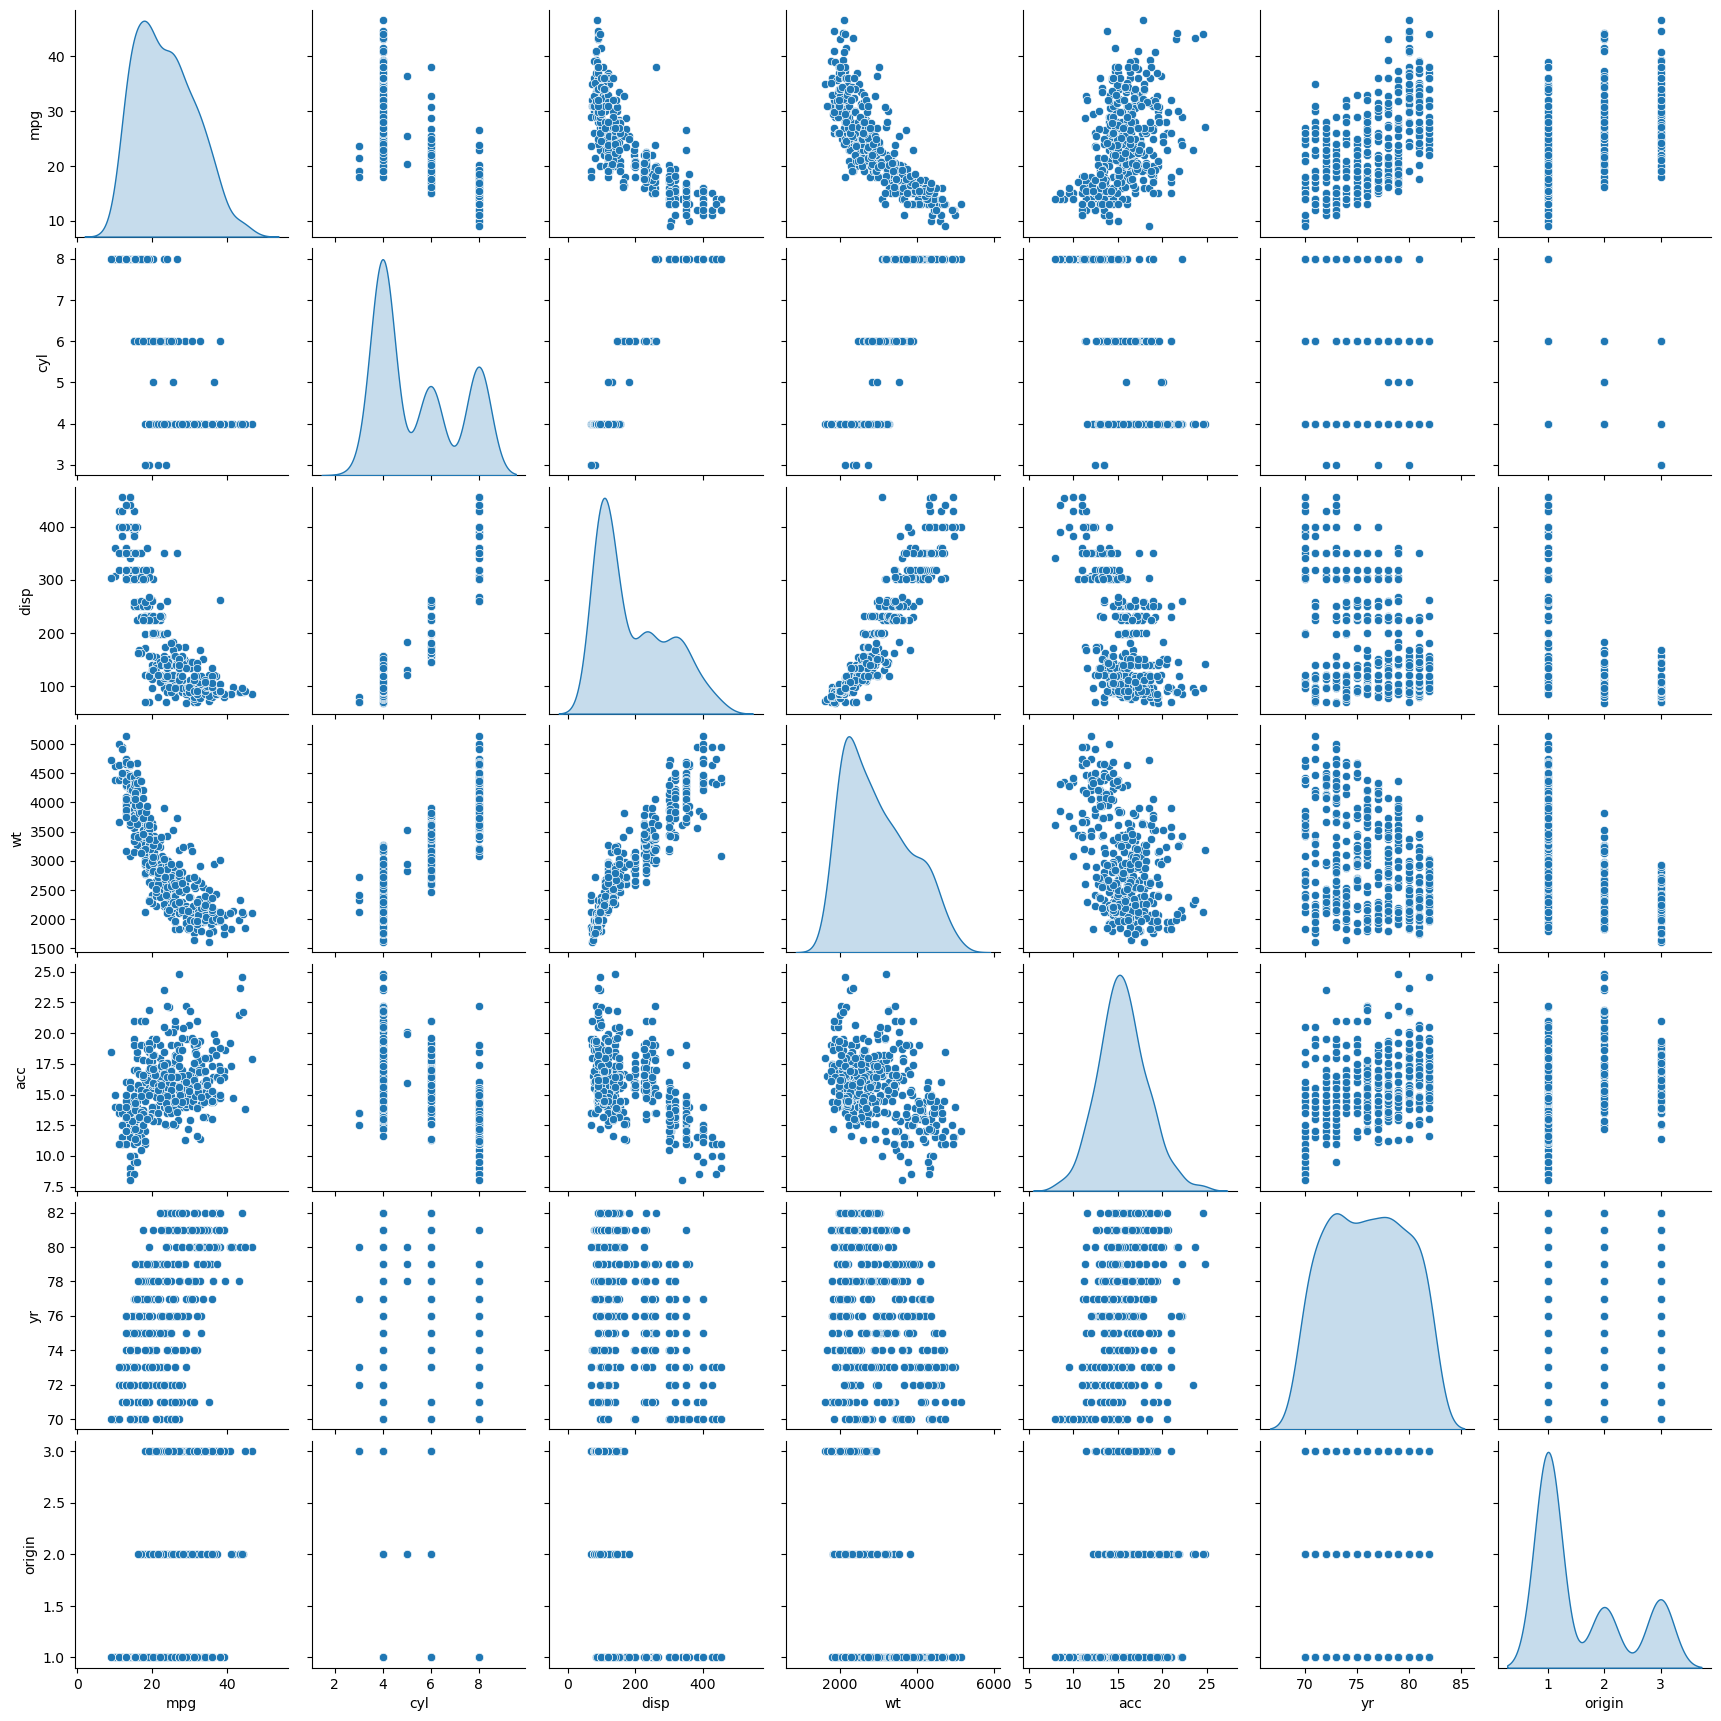

In [11]:
sns.pairplot(car_df, diag_kind = 'kde')

###  Plotting a scatterplot between 'wt', 'disp' using 'cyl' as hue

<Axes: xlabel='wt', ylabel='disp'>

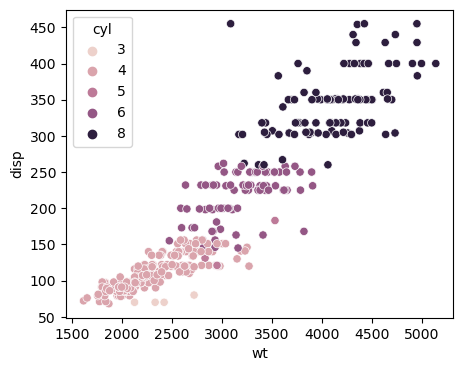

In [12]:
plt.figure(figsize = (5,4))
sns.scatterplot(data = car_df, x = 'wt', y = 'disp', hue = 'cyl')

### Observations

- There are 5 distinct types in 'cyl' feature.
- As weight increases displacement is also increases. we can observe that there is a positive correlation between these two features.
- As weight and displacement values are increasing 'Cylinder' values are also increasing.
- There is one significant outlier in 'disp', that is away from the other data points.

### Plotting a scatter plot between 'Wt' and 'mpg' using 'cyl' as hue

<Axes: xlabel='wt', ylabel='mpg'>

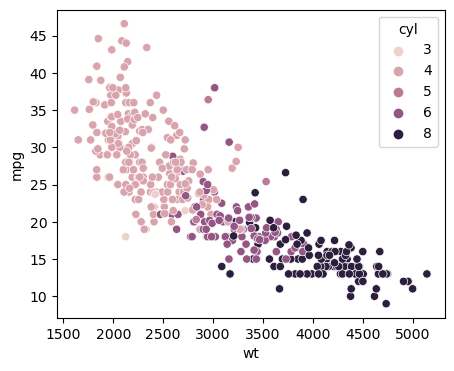

In [13]:
plt.figure(figsize = (5,4))
sns.scatterplot(data = car_df, x = 'wt', y = 'mpg', hue = 'cyl')

### Observations

- From the scatter plot, 'wt' and 'mpg' features are negatively correlated.
- As 'wt' increases 'mpg' is decreasing.
- The size of 'cyl' is incresing according to the 'wt' increasing.
- From the above scatter plots, we can observe thaere is a positive correleation between 'wt' and 'cyl' features.

### Let's check for unexpected values in the dataset

In [14]:
car_df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [15]:
car_df[car_df['hp'].str.isdigit() == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [16]:
print(f"There are {len(car_df[car_df['hp'].str.isdigit() == False])} unexpected values in the 'hp' feature.")

There are 6 unexpected values in the 'hp' feature.


In [17]:
# Let's impute these 6 values with np.nan.
car_df['hp'] = car_df['hp'].replace('?', np.nan)

In [18]:
# dropping the null values.
car_df = car_df.dropna()

In [19]:
car_df.shape

(392, 9)

### Model building

###  Let's apply KMeans clustering on the data

In [20]:
# drop the columns with text values.
df = car_df.drop('car_name', axis = 1)

- Let's scale the data 

In [32]:
scaled_df = df.apply(zscore)

In [33]:
# importing the libraries.
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [34]:
clusters = range(2, 11)
distortion = []
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(scaled_df)
    predictions = model.predict(scaled_df)
    distortion.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis = 1))/df.shape[0])

###  Let's plot a visual to find the correct elbow.

Text(0, 0.5, 'Distortion')

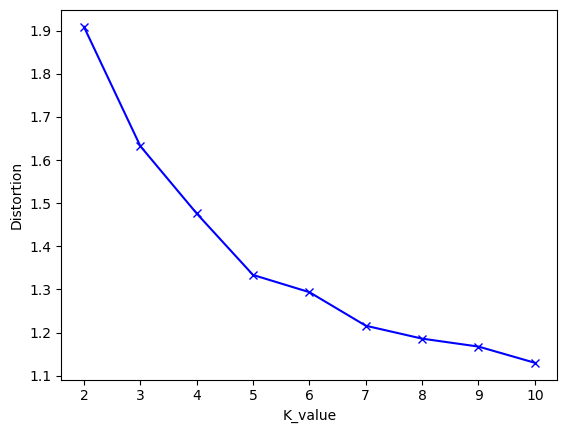

In [35]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('K_value')
plt.ylabel('Distortion')

- The optimum value of 'k' from the elbow method is 5.

### Let's highlight the possible elbow points from the above plot

In [36]:
elbow_points = [(clusters[i], distortion[i]) for i in range(1, len(distortion)-1)
                if distortion[i-1] - distortion[i] > distortion[i] - distortion[i+1]]

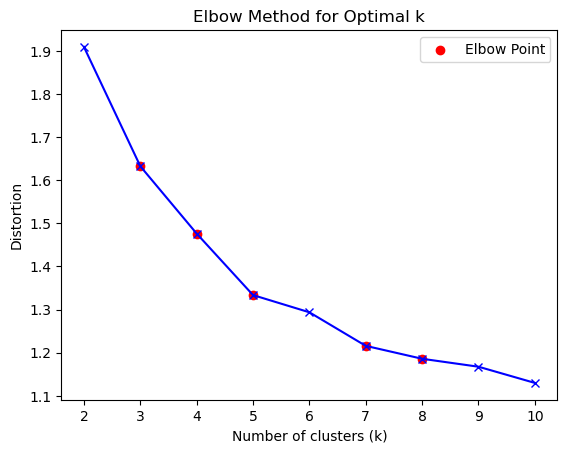

In [37]:
for i, point in enumerate(elbow_points):
    if i == 0:
        plt.scatter(point[0], point[1], color='red', marker='o', label='Elbow Point')
    else:
        plt.scatter(point[0], point[1], color='red', marker='o')
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

- From all the elbow points, 7 seems to be the optimum value of the k.

###  Let's train a KMeans clustering model by setting k = 8.

In [38]:
model_2 = KMeans(n_clusters = 8)
model_2.fit(scaled_df)
predictions = model_2.predict(scaled_df)
print("Cluster Inertia is ", model_2.inertia_)
print("Cluster centers are : ", model_2.cluster_centers_)

Cluster Inertia is  645.43164756446
Cluster centers are :  [[ 1.34855932 -0.80531454 -0.86911878 -0.73225544 -0.92154566  0.08807378
   1.16889572  1.54566155]
 [-0.95930588  1.45896872  1.21959438  1.0388334   1.23828307 -0.66673052
   0.06916235 -0.71664105]
 [ 0.12748963 -0.82948472 -0.81085554 -0.38060299 -0.69049619 -0.09825938
  -0.62201513  0.85541797]
 [ 0.83968538 -0.736407   -0.5986403  -0.53530165 -0.6249415  -0.13650175
   1.02188174 -0.71664105]
 [-1.26261539  1.48394702  1.66186596  1.83129069  1.45817968 -1.34004008
  -1.20477847 -0.71664105]
 [-0.56099034  0.37342513  0.33483176 -0.12716046  0.35249018  0.44258893
  -0.12301183 -0.6662482 ]
 [ 1.21693726 -0.86401356 -1.04001079 -1.19424974 -1.20127552  1.49334351
  -0.20102876  1.22247547]
 [ 0.28872612 -0.7830494  -0.6222601  -0.67240716 -0.33644414  1.40794204
   0.39920361 -0.41660091]]


### Let's add the labels features to the datset.

In [39]:
df['Cluster'] = predictions
scaled_df['Cluster'] = predictions
car_df['Cluster'] = predictions
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Cluster
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,4
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,4
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,4
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,4
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,4


In [40]:
# Let's look at the distribution of each cluster.
car_df.Cluster.value_counts()

Cluster
5    74
2    68
4    53
0    50
1    47
3    46
7    29
6    25
Name: count, dtype: int64

### Let's plot the scatter plot with differenciating clusters

<Axes: xlabel='disp', ylabel='acc'>

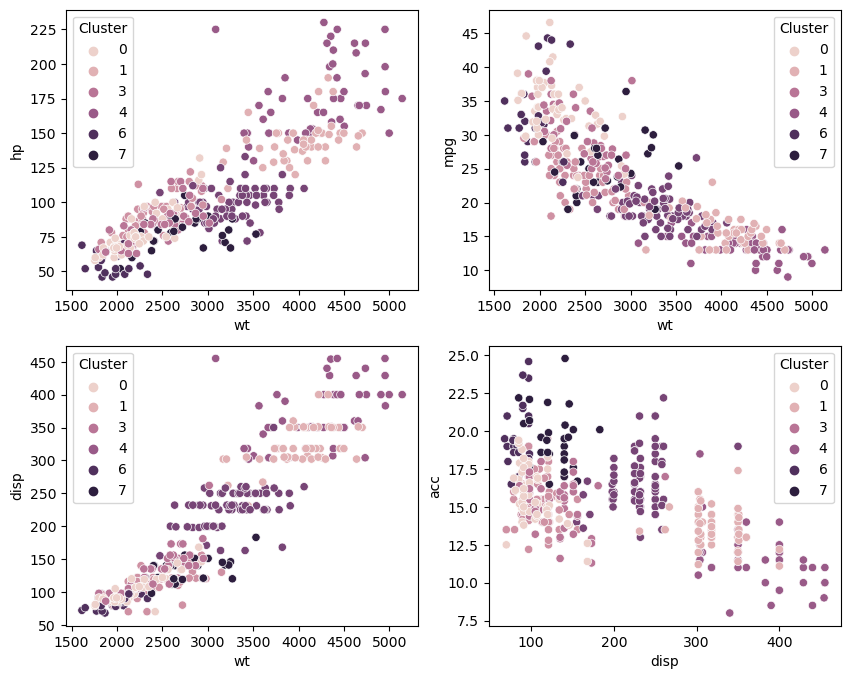

In [41]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.scatterplot(data = car_df, x = 'wt', y = 'hp', hue = 'Cluster')
plt.subplot(2,2,2)
sns.scatterplot(data = car_df, x = 'wt', y = 'mpg', hue = 'Cluster')
plt.subplot(2,2,3)
sns.scatterplot(data = car_df, x = 'wt', y = 'disp', hue = 'Cluster')
plt.subplot(2,2,4)
sns.scatterplot(data = car_df, x = 'disp', y = 'acc', hue = 'Cluster')

In [42]:
synthetic_record = [[19, 6, 306, 150, 3500, 12, 70, 2]]
pred = model_2.predict(synthetic_record)
print(f"Synthetic_record belongs to cluster {pred}.")

Synthetic_record belongs to cluster [4].


# PART-II

### Reading the dataset

In [43]:
viehcle_df = pd.read_csv(r'C:\Users\Jupally Pavan Kumar\Downloads\vehicle.csv')

In [44]:
viehcle_df.shape

(846, 19)

In [45]:
viehcle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


- There are 846 rows and 19 features in the dataset.

### Let's check for the missing values percentage in each feature.

In [46]:
pd.DataFrame({'count' : viehcle_df.isnull().sum()[viehcle_df.isnull().sum() > 0],
             'percentage' :(viehcle_df.isnull().sum()[viehcle_df.isnull().sum() > 0] / viehcle_df.shape[0])*100})

,count,percentage
circularity,5,0.591017
distance_circularity,4,0.472813
radius_ratio,6,0.709220
pr.axis_aspect_ratio,2,0.236407
scatter_ratio,1,0.118203
elongatedness,1,0.118203
pr.axis_rectangularity,3,0.354610
scaled_variance,3,0.354610
scaled_variance.1,2,0.236407
scaled_radius_of_gyration,2,0.236407


- Let's impute these missing values with median of the feature.

In [47]:
viehcle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [48]:
columns = viehcle_df.select_dtypes(['int', 'float']).columns

for i in columns:
    viehcle_df[i] = viehcle_df[i].fillna(viehcle_df[i].median())

In [49]:
pd.DataFrame({'count' : viehcle_df.isnull().sum()[viehcle_df.isnull().sum() > 0],
             'percentage' :(viehcle_df.isnull().sum()[viehcle_df.isnull().sum() > 0] / viehcle_df.shape[0])*100})

,count,percentage


- All missing values are imputed successfully.

### Let's visualize a pie_chart to check the distribution of 'class' variable.

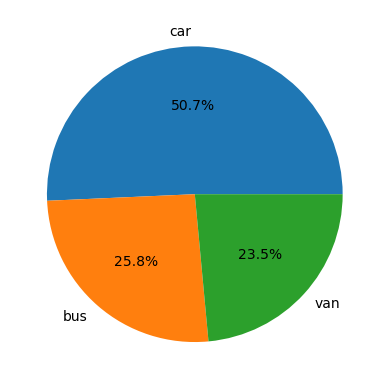

In [50]:
plt.pie(viehcle_df['class'].value_counts(), labels = viehcle_df['class'].value_counts().index, autopct = '%1.1f%%')
plt.show()

- From the pie-chart we can observe that there are three types in 'class' variable.
- (i) car(50.7%)
- (ii) bus(25.8%)
- (iii) van(23.5%).

### Let's look at the duplicated values

In [51]:
viehcle_df.duplicated().sum()

0

- There are no duplicated values in the datset.

<Axes: >

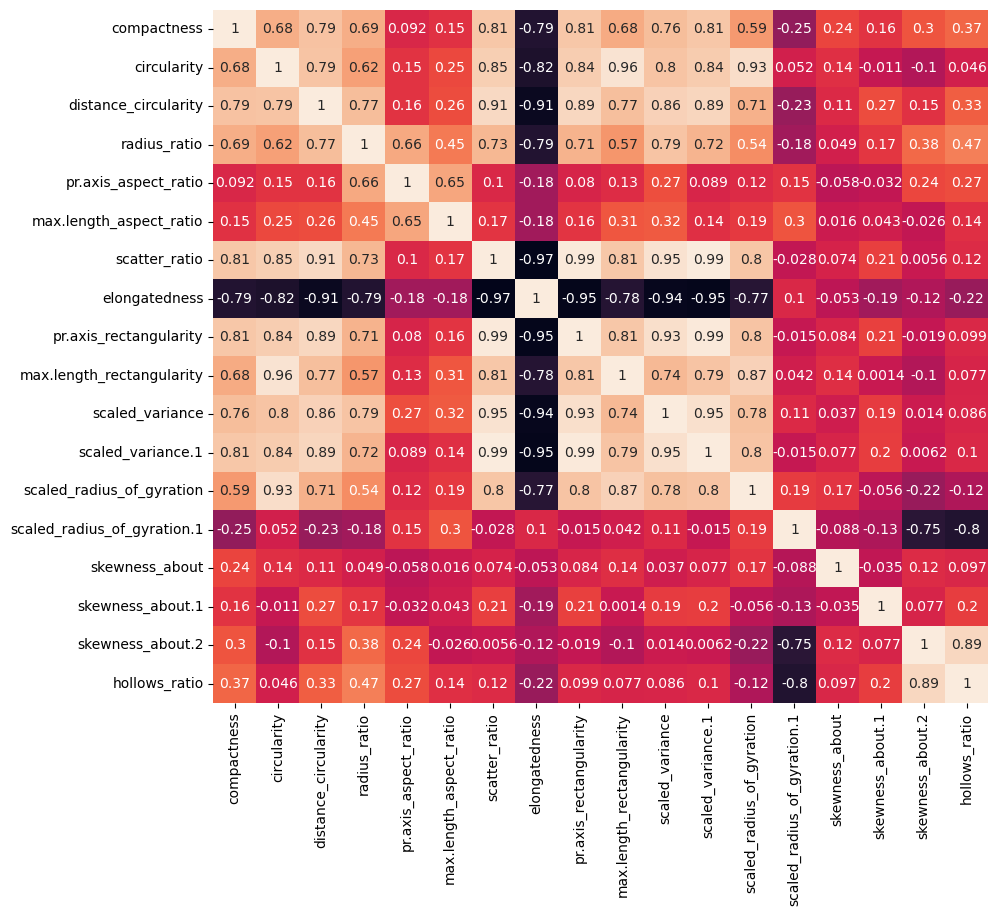

In [52]:
plt.figure(figsize = (10, 9))
sns.heatmap(viehcle_df[viehcle_df.select_dtypes(['int', 'float']).columns].corr(), annot = True, cbar = False)

### Let's split the data into X and y.

In [53]:
X = viehcle_df.drop('class', axis = 1)
y = viehcle_df[['class']]

### Let's split the data into training and testing(80, 20%)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Let's standarize the data

In [55]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

### Let's train a base SVM model on the data.

In [56]:
from sklearn.svm import SVC

model_1 = SVC()
model_1.fit(train_scaled, y_train)
test_pred1 = model_1.predict(test_scaled)
train_pred1 = model_1.predict(train_scaled)

### Let's print the classification_report on train_data

In [57]:
# Let's create a function to print classification metrics.
from sklearn.metrics import *

def metrics(actual, pred):
    print("Accuracy = ", accuracy_score(actual, pred))
    print("Precision = ", precision_score(actual, pred, average='macro'))
    print("Recall = ", recall_score(actual, pred, average='macro'))
    print("F1_score = ", f1_score(actual, pred, average='macro'))

In [58]:
print("******Classification report for train set*******\n")
metrics(y_train, train_pred1)

******Classification report for train set*******

Accuracy =  0.9763313609467456
Precision =  0.9692960960167438
Recall =  0.9782783232052005
F1_score =  0.9734320070146465


In [59]:
print("******Classification report for test set*******\n")
metrics(y_test, test_pred1)

******Classification report for test set*******

Accuracy =  0.9647058823529412
Precision =  0.9635322483423749
Recall =  0.9638888888888889
F1_score =  0.9632231360467101


### Let's apply PCA with 10 components

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(train_scaled)

PCA(n_components=10)

### Visualize Cumulative Variance Explained with Number of Components.

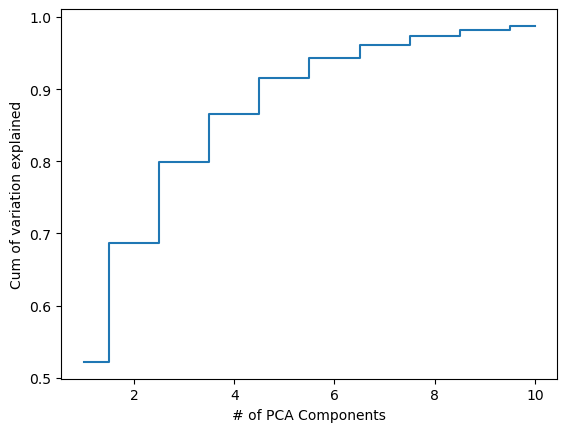

In [61]:
variance = pca.explained_variance_ratio_
plt.step(list(range(1,11)),np.cumsum(variance), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

### Let's draw a horizontal line on the above plot to highlight the threshold of 90%.

<function matplotlib.pyplot.show(close=None, block=None)>

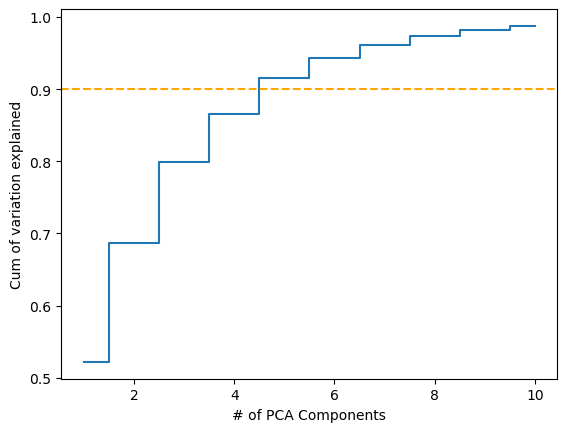

In [62]:
variance = pca.explained_variance_ratio_
plt.step(list(range(1,11)),np.cumsum(variance), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.axhline(y=0.9, color='orange', linestyle='--')
plt.show

### Let's apply PCA on the data.

In [63]:
pca_2 = PCA(n_components = 5)
pca_2.fit(train_scaled)

PCA(n_components=5)

### Let's train a SVM model

In [64]:
train_pca = pca_2.transform(train_scaled)
test_pca = pca_2.transform(test_scaled)

svm_2 = SVC()  # model building.
svm_2.fit(train_pca, y_train)
test_pred2 = svm_2.predict(test_pca)
train_pred2 = svm_2.predict(train_pca)

### Let's print the classification metrics

In [65]:
print("******Classification report for train set*******\n")
metrics(y_train, train_pred2)

******Classification report for train set*******

Accuracy =  0.8150887573964497
Precision =  0.8054143189027171
Recall =  0.7880596190060464
F1_score =  0.7937737111917574


In [66]:
print("******Classification report for test set*******\n")
metrics(y_test, test_pred2)

******Classification report for test set*******

Accuracy =  0.7294117647058823
Precision =  0.719167168523537
Recall =  0.7100427350427351
F1_score =  0.7094484098440277


### Let's tune the parameters of svm model

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma':[0.0001, 0.001,0.01,0.1,1],
             'kernel':['rbf', 'poly', 'linear', 'sigmoid'],
             'C' : [0.0001, 0.001, 0.01, 0.1, 1]}

svm_search = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)

In [68]:
svm_search.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

### Best parameters

In [69]:
print("Best parameters are : ", svm_search.best_params_)

Best parameters are :  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### Let's print the classification metrics

In [70]:
grid_test_pred = svm_search.predict(test_pca)
grid_train_pred = svm_search.predict(train_pca)
print("******Classification report for train set*******\n")
metrics(y_train, grid_train_pred)
print("\n******Classification report for test set*******\n")
metrics(y_test, grid_test_pred)

******Classification report for train set*******

Accuracy =  0.8328402366863905
Precision =  0.8225308146215062
Recall =  0.8085413740107988
F1_score =  0.8123087178483427

******Classification report for test set*******

Accuracy =  0.7588235294117647
Precision =  0.751901604523666
Recall =  0.7478632478632479
F1_score =  0.744708259546146


### Observations

- In base SVM model, average scores on traing data is 97% and 96% for testing data.
- After applying PCA, all metrics on the training set are decreased to 89%.
- After applying pca, average test scores are decrased to 86%.
- The scores are decreased because of applying PCA on the data. After PCA dimensions are reduced from 10 to 6.
- In GridsearchCV SVM model train scores are incresed to 91% but test scores are not increased.
- So, base SVM model is predicting outputs well both on traing and testing data. But even after reducing some dimension the model tends to give 89% accuracy on training and 87% on testing data.
- And after using using GridSearchCV on PCA transformed data, train scores are increased well. So, the model tends to predict good even after reducing the dimensions.

### Prerequisites/Assumptions of PCA.

- PCA requires that the data should be mean_centered.
- PCA assumes that the directions of maximum variance (principal components) are the most informative about the data structure. 
- PCA assumes that the relationship between features are linear.
- The data distribution should be numerical while performing PCA.

### Advantages of PCA

- PCA is used as a Dimensionality reduction technique to improve machine learning model performance.
- PCA extracts the most important features or patterns from the data, allowing for a more compact representation.
- PCA can be used for data visualization purposes, especially when dealing with high-dimensional data.
- PCA is particularly useful when dealing with multicollinearity (highly correlated variables). It transforms correlated variables into a set of uncorrelated components.

###  Limitations of PCA

- After applying PCA, the resulting principal components may not have clear and interpretable meanings in terms of the original variables.
- When we are dealing with PCA, data should not have outliers. Outliers can distort the covariance structure and affect the principal components.
- Reducing the dimensionality of the data inevitably leads to some information loss.
- PCA assumes linear relationship between attributes. It is ineffective when relationships are non linear.